<a href="https://colab.research.google.com/github/CarolineOlive/Imersao-Dados-2021/blob/main/Desafios_Imersao_dados_3_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafios Imersão Dados 3 - Alura

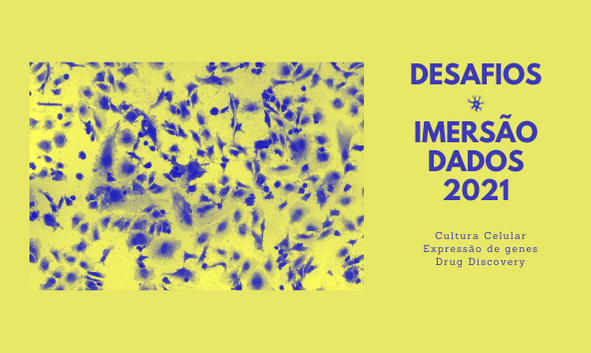

Autora: Caroline Silva de Oliveira

LinkedIn: www.linkedin.com/in/caroline-oliveira-quim


## Aula 1 - Análise de dados, python, pandas e novos fármacos

Nesta aula aprendemos a  importar os dados utilizando uma URL e ainda descompactar o arquivo zip. A partir desses dados, fizemos algumas análises exploratórias dos mesmos para conhecer os dados que serão analisados. Os dados se referem a experimentos de cultura de células (amostra e controle) utilizando diferentes tipos de drogas, com 2 dosagens diferentes e em 3 tempos distintos. Essa informações foram obtidas fazendo seleções no dataset e avaliando cada variável separadamente. Vimos, também, formas de mostrar os dados em formato gráfico (gráfico de pizza, uma opção ruim). Com os desafios, aprendemos a renomear títulos dadas colunas, usar a função query e a plotar gráficos mais informativos.

* Funções utilizadas:

```python
#visualizar os dados:
.head #somente o início do df
.tail #somente o final do df

#avaliar as variáveis:
.shape #formato
.unique() #valores únicos
.value_counts() #frequência
.value_counts(normalize) #proporção
.query() #fazer seleção de dados

#plotar gráficos
.plot.bar
.plot.pie

#renomear títulos
str.replace()
```

Aprendemos ainda, um pouco sobre biologia celular. Em resumo, as células são constituídas por uma membrana chamada membrana citoplasmática, ali dentro está contido o núcleo da célula, onde se encontra o DNA celular. O DNA é formados por fragmentos de genes e estes são responsáveis por sintetizar as proteínas. Contudo, as proteínas são sintetizadas fora do núcleo e a informação necessária para a síntese é transportada para fora do núcleo através do RNA mensageiro, produzindo então 4 fitas de RNA. Essas 4 fitas representam a expressão gênica 1 (1x = 1 vez). No entanto, as células podem receber diferentes estímulos e, dependendo do estímulo, a expressão pode ser aumentada ou reduzida.

In [1]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
#importando bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#importando os dados
dados = pd.read_csv('/content/drive/MyDrive/Imersão dados 3/imersaodados3-main/dados/dados_experimentos.csv')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


**Entendendo os dados**

id = identificador único para cada experimento

tratamento = categorias: com_droga , com_controle

dose = diferentes dosagens

dogras = tipos de substâncias testadas

g_x = dados de expressão genética, dados normalizados



---



---



###Desafio 1: Por que há essa diferença no número de experimento controle e drogas?

É sabido que em <font color ='darkcyan'>**experimentos controle não são administradas drogas**</font>. No entanto, quando avaliamos a coluna 'dogra' observamos que não há dados nulos, ou seja, há uma droga atribuida a cada experimento. Então, selecionando apenas os dados de experimentos controle e avaliando quais drogas são atribuidas a cada experimento, vemos que apenas a <font color ='darkcyan'>droga chamada de 'cacb2b860' foi atribuida a esses experimentos</font>. Isso indica que esse número foi dado a não adição de drogas ao experimento. Respondendo especificamente a pergunta, o dataset mostra que <font color ='darkcyan'>diversas drogas foram testadas</font> e que para todas elas pode-se utilizar os <font color ='darkcyan'>mesmo experimentos controles</font> para comparação. Sendo assim, <font color ='darkcyan'>**um número menor de experimentos controle podem ser realizados**</font>. 

Os códigos utilizados estão descritos abaixo.

In [3]:
#avaliando se há algum dado nulo
dados['droga'].isna().value_counts()

False    23814
Name: droga, dtype: int64

In [4]:
#avaliando os experimento controle
dados_controle = dados.query('tratamento == "com_controle"')
dados_controle

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.2189,-0.5262,-0.2982,-0.2491,-0.6373,-1.0040,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,0.2427,0.5214,0.0587,-0.5903,0.1332,-0.3517,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.0000,0

In [5]:
#avaliando a coluna
dados_controle['droga'].value_counts()

cacb2b860    1866
Name: droga, dtype: int64

### Desafio 2: Plotar as 5 ultimas linhas da tabela

In [6]:
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


###Desafio 3: Calcular a proporção das classes tratamento.

In [7]:
dados['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

### Desafio 4: Quantos tipos de drogas foram investigadas?

In [8]:
len(dados['droga'].unique())

3289

In [9]:
dados['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
f0d1b8dbc       1
00dba5599       1
e3fe7b417       1
5cc5a5a19       1
ddb7e0c01       1
Name: droga, Length: 3289, dtype: int64

Foram utilizadas 3288 drogas (compostos ou moléculas), visto que 1 delas representa o controle.

### Desafio 6: Renomear as colunas tirando o hífen.

In [10]:
#retirando hífen do nome das colunas utilizando a função replace para string
dados.columns = dados.columns.str.replace("-", "")

### Desafio 5: Procurar na documentação o método query. 

In [11]:
#selecionando dados usando a função query
dados.query('g0 > 0')

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.5537,0.1063,0.3893,...,0.5554,0.2225,-0.0903,0.9227,-0.0460,0.3756,1.0730,-0.

In [12]:
cont_1 = len(dados.query('tratamento == "com_controle" and dose == "D1"'))
cont_2 = len(dados.query('tratamento == "com_controle" and dose == "D2"'))
print(f'Experimentos controle realizados para cada dosagem: \n dosagem D1: {cont_1} \n dosagem D2: {cont_2}')

Experimentos controle realizados para cada dosagem: 
 dosagem D1: 951 
 dosagem D2: 915


### Desafio 7: Deixar os gráficos visualmente melhores.

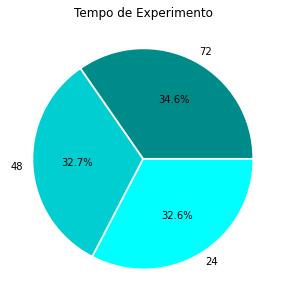

In [13]:
#plotando com matplotlib
plt.figure(figsize=(5,5))
plt.pie(dados['tempo'].value_counts(), explode=(0.01, 0.01, 0.01), labels=[72, 48, 24], colors=['darkcyan', 'darkturquoise', 'cyan'], autopct='%1.1f%%')
plt.title('Tempo de Experimento')
plt.show()

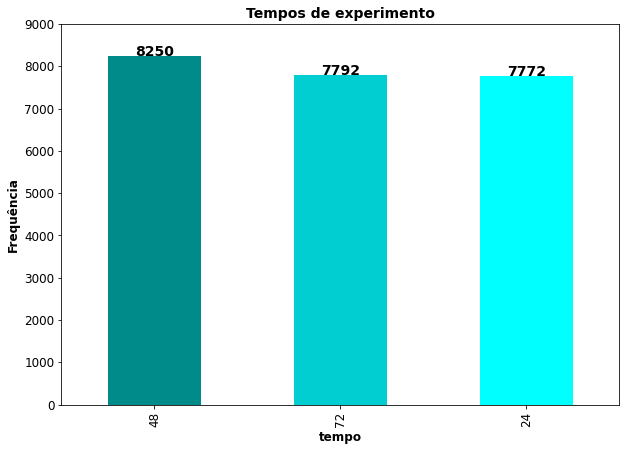

In [14]:
#plotando os dados de tempos de experimento utilizados
plt.figure(figsize=(10,7))
ax = dados['tempo'].value_counts().plot.bar(color = ['darkcyan', 'darkturquoise', 'cyan'])
plt.title('Tempos de experimento', fontsize = 14, fontweight = "bold")
plt.ylabel('Frequência', fontsize=12, fontweight = "bold")
plt.xlabel('tempo', fontsize=12, fontweight = "bold")

plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.ylim(0, 9000)

for indice, p in enumerate(ax.patches):
  ax.text(x=indice, y=p.get_height()+.5, s=str(p.get_height()), ha='center', fontsize=14, fontweight="bold")

plt.show()



---



---



##Aula 2 - Estatísticas, visualização de dados e distribuições

Nesta aula utilizamos as funções `.rename` e .`query()` que apareceram nos desafios da Aula 1. Selecionamos algumas variáveis de interesse para plotarmos o gráficos. Uma super novidade para mim foi o uso do '...`in @`' para fazer uma `query`. Dessa forma, podemos utilizar uma variável (cod_compostos) que foi definida fora do dataset para buscar dados dentro do mesmo. Por isso utilizamos: 

```python
dados.query('composto in @cod_compostos')
```

Exploramos um pouco a **biblioteca Seaborn**, para construir gráfico com melhores visualizações, e construímos gráficos usando variáveis de gene (g) e células (c). Plotamos **gráfico de barras** para visualizar os 5 composto mais utilizado, **histograma** para visualizar a distribuição dos dados da coluna 'g0' e, também, o **boxplot**, uma outra maneira de observar essa distribuição. Uma informação adicional que o boxplot traz é a estatística descritiva dos dados. Nele podemos visualizar a os quartis contendo a mediana, máximo e mínimo dos dados e os outliers. Como explicado pela [Vanessa Leiko](https://www.linkedin.com/in/vanessa-leiko-oikawa-cardoso/), os outliers, biologicamente falando, podem ser um ponto de atenção. A resposta desejada pode estar nos outliers e não nos dados mais frequentes. Tudo dependerá da análise e do que se deseja obter.

Funções utilizadas:

```python

Construção de gráficos
sns.countplot(order=) #Barra; 'order' parâmetro para ordenar as barras
ax.set_title(fontsize=12, fontweight="Bold") #parâmetros para alterar o tamanho da letra e colocar negrito
ax.set_xlabel() #adicionar título
df.hist() #Histograma
sns.histplot() #Histograma seaborn
sns.boxplot() #Boxplot

Análise dos dados
len() #tamanho dos dados
.describe() #descrição
.loc[] #selecionar dados
```


In [15]:
#alterando o nome da coluna 'droga'
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace=True)

In [16]:
#Selecionando dados - index dos 5 primeiros mais frequentes
cod_compostos = dados['composto'].value_counts().index[0:5]
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

### Desafio 1: Ordenar o gráfico countplot.
### Desafio 2: Melhorar a visualização alterando tamanho da fonte.


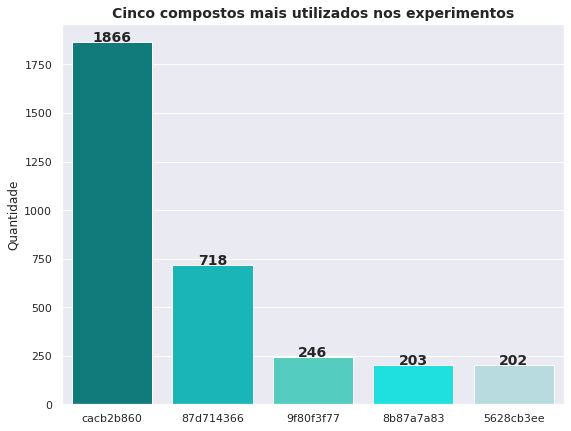

In [17]:
#criando um gráfico de barras
sns.set()
plt.figure(figsize=(9,7))
ax = sns.countplot(x='composto', data=dados.query('composto in @cod_compostos'), palette=['darkcyan', 'darkturquoise', 'turquoise', 'cyan', 'powderblue'], order=cod_compostos)
ax.set_title('Cinco compostos mais utilizados nos experimentos', fontsize=14, fontweight="bold")
ax.set_xlabel('')
ax.set_ylabel('Quantidade')

for indice, p in enumerate(ax.patches):
  ax.text(x=indice, y=p.get_height()+.5, s=str(p.get_height()), ha='center', fontsize=14, fontweight="bold")

plt.show()

###Desafio 3: Plotar os histogramas com o seaborn

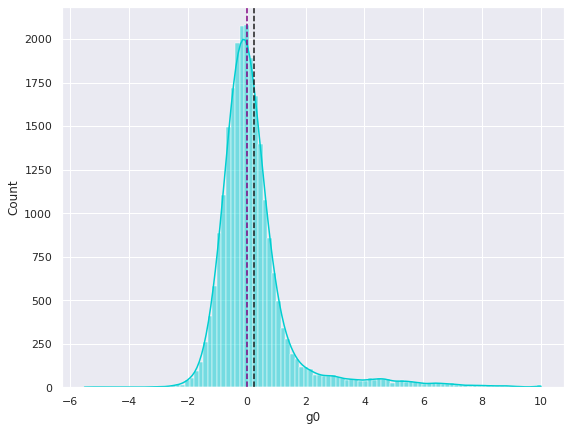

In [18]:
#visualizando os dados através do Histograma do Seaborn
plt.figure(figsize=(9,7))
ax = sns.histplot(x='g0', data=dados, bins=100, color='darkturquoise', kde=True)
plt.axvline(x=dados["g0"].mean(), linestyle="--", color='k') #plotando linha da média
plt.axvline(x=dados["g0"].median(), linestyle="--", color='purple') #plotando linha da mediana
plt.show()


###Desafio 4: Estudar sobre as estatísticas retornadas no .describe()

Estatística descritiva. 
Deixo aqui a indicação desta apresentação que possui explicações bem legais.
https://www.ime.unicamp.br/~hlachos/estdescr1.pdf

### Desafio 5: Refletir sobre o tamanho das visualizações

Um gráfico pequeno pode, algumas vezes, achatar os dados, gerando um efeito visual que leva a interpretações errôneas. Assim como o tamanho dos eixos, que devem ser ajustados para melhorar a visualização.

### Desafio 6: Fazer outras análises com o boxplot e com o histograma

Para construir este boxplot selecionei apenas o <font color ='darkcyan'>composto '87d714366'</font>, o qual foi o mais utilizado nos experimentos. Plotei dos valores obtidos para <font color ='darkcyan'>g0 (eixo y) por dosagem (D1 e D2, eixo x)</font>. Para cada dosagem, coloquei uma separação pelo <font color ='darkcyan'>tempo</font> de experimento utilizando o <font color ='darkcyan'>parâmetro **hue** </font>.


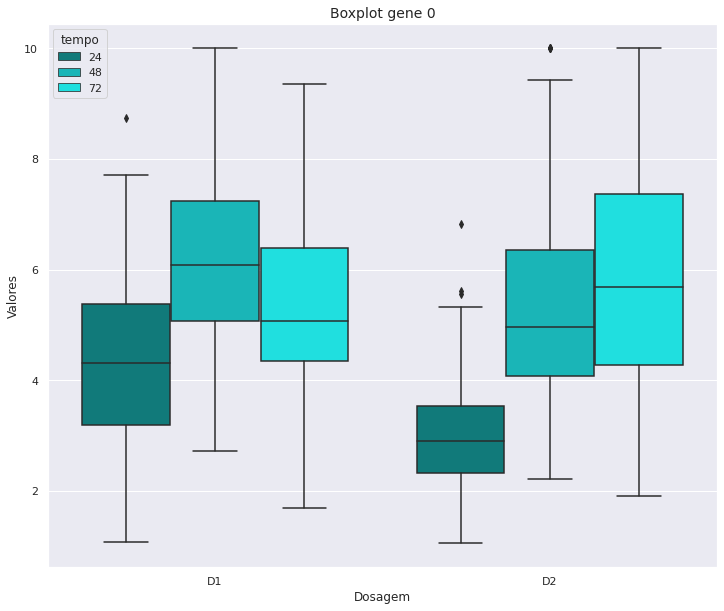

In [19]:
ax = sns.boxplot(x='dose', y='g0', data=dados.query('composto == "87d714366"'), hue='tempo', palette=['darkcyan', 'darkturquoise', 'cyan'])
ax.figure.set_size_inches(12, 10)
ax.set_title("Boxplot gene 0", fontsize=14)
ax.set_xlabel('Dosagem')
ax.set_ylabel('Valores')
ax;



---



---



## Aula 3 - Correlações, causalidade e relações entre genes

A aula foi focada em analisar **frequências** e **correlações**. Uma forma de verificar a frequência de um dado é utilizando a função `pd.crosstab()`. Com essa função podemos avaliar a frequência de um dado com relação a uma outra variável como por exemplo, quantos tratamento controle e com droga foram feitos para cada tempo e dosagem diferentes. Diferentes informações de frequência podem ser visualizados alterando parâmetros como `values` e `aggfunc`. É possível, também, avaliar essas frequências na forma de proporção ajustando o parâmetro `normalize`.  Vimos, também, que a função `groupby` também permite obter informações semelhantes. Fomo desafiados e explorar a função `melt` que transforma o índice das colunas em uma nova coluna e, também, constrói uma nova coluna com todos os valores. Esse função pode ser muito útil para analisar graficamente vários valores ao mesmo tempo, por exemplo.

Plotamos gráficos de `scatterplot` e `heatmap` para avaliar a correlação entre as variáveis.

- scatterplot permite correlacionar duas variáveis.
    - Cada valor funciona como uma coordenada para a formação de cada ponto do scatterplot.
- heatmap é possível avaliar a correlação entre diversas variáveis.

Vimos ainda o uso da função `sns.lmplot` para plotar o scatterplot com um linha de tendência. Esta função combina a dinção `regplot ()` e o FacetGrid (Grade multi-plot para plotar relações condicionais.) É uma interface conveniente para comparar subconjuntos de dados que são apresentados em gráficos separados, plotados em colunas e linhas.

Foi levando uma discussão muito interessante sobre o **efeito de causalidade**. Muitas vezes, no desenvolvimento de uma pesquisa estamos interessados em identificar a correlação entre variáveis e inferir sobre os efeitos observados. No então, é preciso muito cuidado e outras análises para dizer se a correlação observada é causada pelo efeito de uma variável sobre a outra. Nessa análise, podemos encontrar que a alteração de duas variáveis que se correlacionam é causada por uma terceira variável, dentre outras diversas possibilidades.

Deixo aqui um resumo das funções utilizadas:

```python
#Construir tabelas | Avaliar frequência
.crosstab() 
	normalize=True 
	normalize='index'
	normalize='columns'
	aggfunc='mean' #agregador
.groupby()
pd.melt() #transformar os dados e construir nova tabela

#Gráficos
sns.scatterplot()
sns.lmplot()
sns.heatmap()

#Correlação
.corr()
```

### Desafio 1: Criar tabela de frequência com o `pandas.groupby()`

In [20]:
dados.groupby(['dose', 'tempo'])['tratamento'].value_counts()

dose  tempo  tratamento  
D1    24     com_droga       3585
             com_controle     301
      48     com_droga       4011
             com_controle     343
      72     com_droga       3600
             com_controle     307
D2    24     com_droga       3581
             com_controle     305
      48     com_droga       3591
             com_controle     305
      72     com_droga       3580
             com_controle     305
Name: tratamento, dtype: int64

### Desafio 2: Normalizar o crosstab pela coluna

In [21]:
#alterando o parâmetro normalize para normalizar pela coluna
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

### Desafio 3: Explorar outros agregadores

Podem ser utilizados diversos agregadores dependendo do que se pretender obter. Alguns deles são: `'sum'`, `'count'`, `'mean'`, `'median'`



In [22]:
#avaliando a média dos valores obtidos para o gene 0
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='sum')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

### Desafio 4: Explorar o melt.

A função `.melt` transforma o indice das colunas em uma nova coluna e, também, um constrói uma nova coluna com todos os valores.

Testei o uso da função melt mantendo a coluna 'tratamento' sem alteração e selecionando as colunas 'g0' e 'g1'. Os dados destas colunas foram separados em duas novas colunas, uma contendo os genes e outra contendo os valores de expressão obtidos para cada gene.


In [23]:
pd.melt(dados, id_vars=['tratamento'], value_vars=['g0', 'g1'], var_name='gene', value_name='expresao')

,tratamento,gene,expresao
0,com_droga,g0,1.0620
1,com_droga,g0,0.0743
2,com_droga,g0,0.6280
3,com_droga,g0,-0.5138
4,com_droga,g0,-0.3254
...,...,...,...
47623,com_droga,g1,-0.0636
47624,com_droga,g1,0.3478
47625,com_controle,g1,0.3756
47626,com_droga,g1,0.2324


### Desafio 05: Calcular e analisar a correlação entre G e C. Avaliar as correlações e relacionar com efeitos biológicos.

In [24]:
#seleção das variáveis gene e celula
genes = dados.loc[:, 'g0':'g49']
celulas = dados.loc[:, 'c0':'c49']

#construindo novo dataset
genes_celulas = pd.concat([genes, celulas], axis=1)
genes_celulas.head()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078,0.3799,-0.1727,0.3817,0.3600,0.5124,-0.1414,0.6159,0.4689,-0.0773,0.4728,-0.0143,-0.5344,0.3578,0.3248,0.8903,0.3431,1.0340,1.3070,-1.0230,0.7709
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474,0.5589,0.4481,0.1888,0.3712,0.7837,0.6860,0.4123,0.1560,-0.1203,-1.2780,0.6743,0.7358,0.1334,-0.5193,0.2281,0.0158,-0.5658,0.6065,0.6259,0.4716
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225,0.6274,-0.3038,0.1171,-0.0550,-0.0289,1.1740,-0.7937,-1.0610,-0.6409,0.3884,-1.0330,-0.0055,0.1212,-0.7020,-0.7065,-0.5192,-0.3181,0.1787,0.3354,0.1349
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250,0.1895,-2.4220,0.0670,-1.9870,-0.6482,-0.0023,-1.9930,-0.8042,-3.6160,-0.3487,-1.2560,-2.7220,-2.1970,-2.9030,-1.1030,-2.3020,-2.0030,-1.3390,-3.0160,-3.0040
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624,1.0010,0.0840,-0.6553,-0.1093,0.0587,0.5490,0.6331,0.5227,0.2186,0.2781,0.8947,-0.0202,0.5966,0.2249,0.5671,0.6382,-0.3909,0.7040,0.1462,0.0655,-0.5605,0.5903,-0.2353,-0.1285,-0.1740


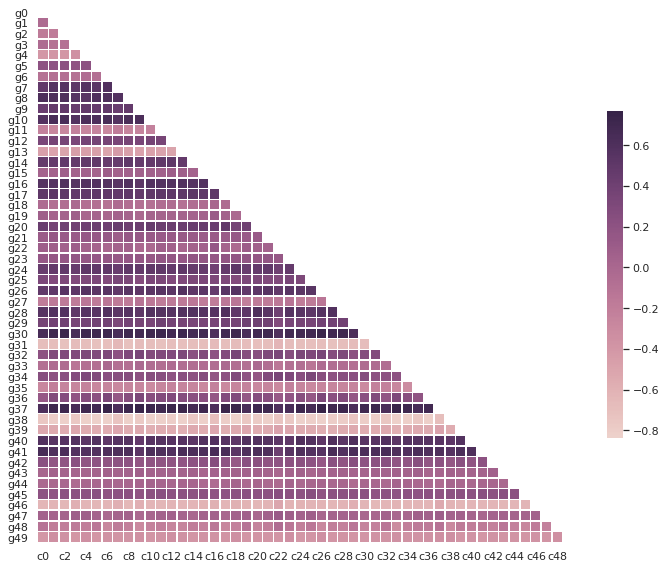

In [25]:
#gerando a matriz de correlação
corr = genes_celulas.corr()

#filtrando a matriz de correlação para obter os dados de gene em um eixo e os dados de célula em outro eixo
corr_filtro = corr.loc[:'g49','c0':]

#plotando a matriz de correlação para os dados de viabilidade celular

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_filtro, dtype=bool), )

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_filtro, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Desafio 6: Estudar o código que plota a matriz de correlação (heatmap)

```python
sns.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', 
annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, 
xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
```
* `cmap` representa o mapa de cores do heatmap. O seaborn possui uma paleta de cores que permite alterar a cor do heatmap. Nesse [link](https://seaborn.pydata.org/tutorial/color_palettes.html) você encontra diversas opções. 
* A intensidade das cores é ajusta de acordo com o parâmetro `center`.
* `mask` indica o formato do heatmap.
* `annot=True` imprime dentro do heatmap os valores de cada correlação.
* `vmin` e `vmax` permitem definir os valores mínimos e máximos de correlação que serão apresentados no heatmap.

>Para tirar o fundo cinza é só ajustar o tema da figura
```python
sns.set_theme(style="white")
```








---



---



## Aula 4 - Merge de dados e análise de resultados

Nesta aula trabalhamos com outro dataset e vimos algumas formas de selecionar dados por tipo, excluir variável e alterar uma string. Podemos alterar a label de uma coluna usando padrões presentes nas labels a serem alteradas usando a função `.split()`. Dados no formato string que indicam categoria também podem ser transformados em dados inteiros (categoria numérica) usando a função `.astype()` Aprendemos a juntar dois datasets usando a função `.merge`.  Avaliamos os dados de atividade dos compostos sobre alguns genes, as possíveis diferenças devido dosagem e tempo de experimento utilizando o boxplot para visualização dos dados.

Funções utilizadas:

```python
.select_dtypes('int') #seleção por tipo de variável
.drop('id', axis=1) #excluindo a coluna indesejada
.str.split('_').str[-1] #alterar string
.merge #Combinação de dataframes
pd.get_dummies() #separação de colunas de dados categóricos
```

In [27]:
#Importando os dados de resultados
dados_resultados = pd.read_csv('/content/drive/MyDrive/Imersão dados 3/imersaodados3-main/dados/dados_resultados.csv')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Desafio 1: Encontrar os top 10 das ações da drogas.

função de str; tem um separador padrão q pode ser usado

In [28]:
#usando a função split para remover toda a parte dos nomes separada por underscore, deixando apenas a ultima palavra
contagem_acao = dados_resultados.columns.drop(['id']).str.split('_').str[-1].value_counts()
contagem_acao

inhibitor            112
antagonist            32
agonist               28
activator              5
agent                  3
blocker                2
local                  1
antihistamine          1
donor                  1
antiprotozoal          1
antiarrhythmic         1
anticonvulsant         1
scavenger              1
antibiotic             1
antioxidant            1
antimalarial           1
steroid                1
medium                 1
antifungal             1
diuretic               1
secretagogue           1
sensitizer             1
b                      1
laxative               1
anti-inflammatory      1
analgesic              1
stimulant              1
antifolate             1
antiviral              1
immunosuppressant      1
dtype: int64

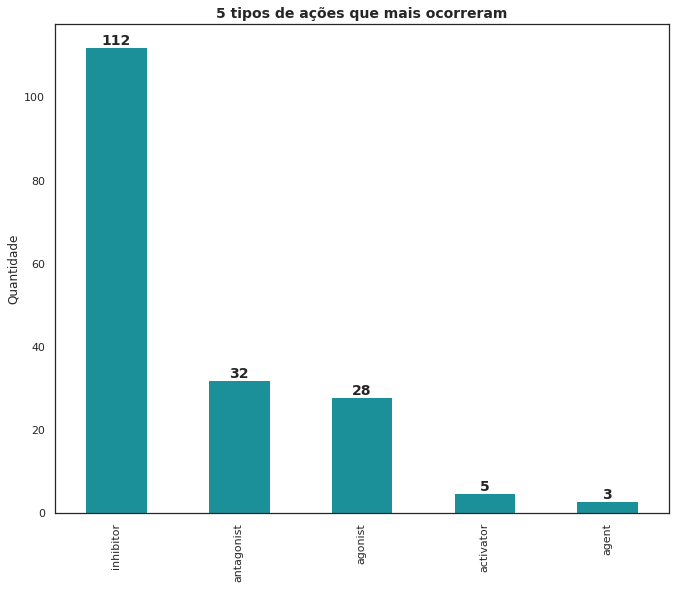

In [29]:
#Plotando os top 5
plt.figure(figsize=(11,9))
ax = contagem_acao[:5].plot.bar(color='#1c9099')
ax.set_title('5 tipos de ações que mais ocorreram', fontsize=14, fontweight="bold")
ax.set_xlabel('')
ax.set_ylabel('Quantidade')

for indice, p in enumerate(ax.patches):
  ax.text(x=indice, y=p.get_height()+.5, s=str(p.get_height()), ha='center', fontsize=14, fontweight="bold")

plt.show()

### Desafio 2: Criar a coluna 'eh_controle' para quando na linha tratamento == com_controle.

In [31]:
#criando nova coluna com o número total de mecanismos ativados em cada experimento
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

In [32]:
#criando uma nova coluna que traz a informações de atividade em cada experimento
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0) #se 'n_moa' = 0, indica que o composto/droga/substância foi inativo.
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [33]:
#criando o novo dataset
dados_combinados = pd.merge(dados, dados_resultados[['id', 'n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [34]:
#criando uma nova coluna com dados binários
eh_controle = dados_combinados['tratamento'] == 'com_controle'
dados_combinados['eh_controle'] = eh_controle.astype('int')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0


In [35]:
dados_combinados['eh_controle'].unique()

array([0, 1])

* com_controle = 1
* com_droga = 0

Outra forma de criar dados binários é usando o `cat.codes`.
```python
#criando uma nova coluna com dados binários
dados_combinados['eh_controle'] = dados_combinados['tratamento'].astype("category").cat.codes
dados_combinados.head()
```
 No entanto, ele atribui 0 para com_controle e 1 para com_droga.



### Desafio 5: Fazer análises mais detalhada considerando tempo e dose para comparar as distribuições. (escolher uma droga e comparar com o controle)


A droga mais utilizada nos experimentos foi a **87d714366**.

A droga **cacb2b860** representa os experimentos controle.

In [36]:
#selecionando os dados da droga mais utilizada e os dados dos experimentos controle
composto_most_freq = dados_combinados.query('composto == "87d714366"')
controle = dados_combinados.query('composto == "cacb2b860"')

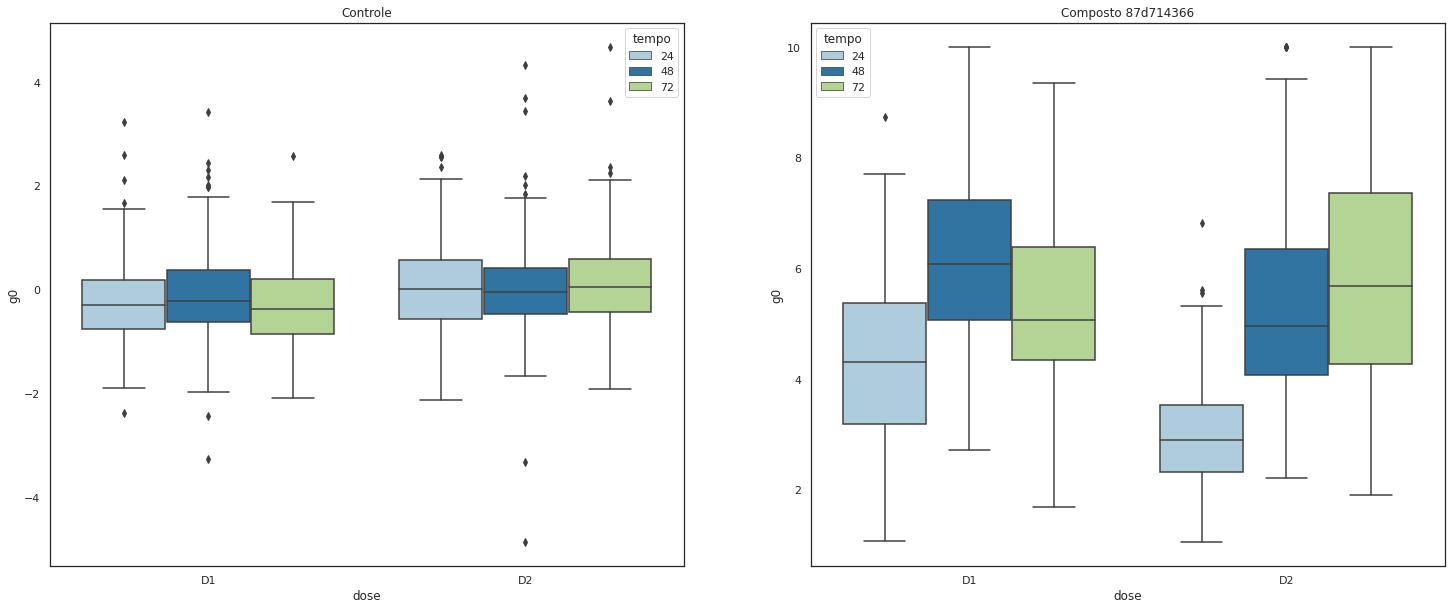

In [37]:
#plotando os dados para o gene 0
fig, axs = plt.subplots(1,2,figsize=(25,10))
palette = sns.color_palette("light:#5A9", as_cmap=True)
sns.boxplot(data = controle, y='g0', x='dose', hue='tempo',  palette=sns.color_palette('Paired', n_colors=3), ax=axs[0])
axs[0].set_title('Controle')
sns.boxplot(data = composto_most_freq, y='g0', x='dose', hue='tempo', palette=sns.color_palette('Paired', n_colors=3), ax=axs[1])
axs[1].set_title('Composto 87d714366')

ax;

Os gráficos permitem visualizar a clara diferença entre controle e com droga. No experimentos com a substância '87d714366' é possivel observar a diferença na expressão do gene devido ao tempo, principalmente de 24 para 48 e 72 horas. Há diferença, também, a diferença entre as dosagens utilizadas, sendo que a dose 2 gerou menor atividade no tempo de 24 horas que a dose 1.

In [38]:
composto_most_freq.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle
16,id_002fb9c19,com_droga,48,D1,87d714366,8.738,0.1914,2.4380,-0.293,3.2010,1.4910,5.3920,-1.042,-8.486,-2.579,-6.747,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.285,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.622,0.7204,-2.5930,-4.063,-0.8282,-3.500,0.9206,-5.145,9.804,-2.6840,-2.439,-0.1427,...,-10.000,-8.511,-10.000,-10.000,-10.000,-10.000,-8.887,-10.000,-10.000,-10.000,-10.000,-4.902,-9.984,-5.552,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.796,-8.177,-9.899,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-9.984,-6.784,2,True,0
76,id_00cf039a7,com_droga,48,D2,87d714366,4.546,0.4257,0.7670,2.195,2.5960,0.3677,-0.3854,-1.159,-8.180,-2.131,-4.168,2.5630,-1.3410,5.2610,-2.5680,1.0840,-3.835,-4.8440,0.8522,0.2435,-2.6090,0.3067,0.9733,-1.608,-2.9210,-1.9570,-2.644,2.4030,-3.036,-6.4520,-3.258,4.355,-0.7562,0.993,-0.2854,...,-9.995,-6.135,-9.986,-8.504,-8.528,-9.995,-6.254,-9.995,-6.955,-9.995,-9.743,-3.457,-8.712,-3.972,-8.709,-10.000,-8.461,-9.347,-8.698,-9.807,-10.000,-10.000,-10.000,-5.657,-5.513,-8.284,-9.490,-8.729,-10.000,-7.834,-9.538,-10.000,-8.520,-10.000,-7.436,-6.918,-5.235,2,True,0
119,id_01534c4ee,com_droga,72,D2,87d714366,10.000,-1.2200,1.5150,-2.191,4.3530,-0.9594,2.5600,-3.312,-9.507,-3.393,-4.160,-2.9320,0.0000,2.2650,-6.2560,0.1147,-4.209,-3.5580,3.2920,0.1551,-3.7200,0.1069,1.3000,1.971,-9.9350,-1.8340,-1.072,0.2092,-1.989,-4.0390,-6.047,8.404,3.1040,-3.339,-2.8780,...,-9.978,-8.823,-9.978,-9.513,-9.832,-9.978,-6.568,-9.978,-8.664,-9.978,-9.978,-4.073,-10.000,-5.163,-7.797,-10.000,-8.297,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.019,-8.688,-9.658,-9.308,-10.000,-10.000,-7.703,-10.000,-10.000,-9.054,-10.000,-8.771,-9.694,-5.548,2,True,0
209,id_0236e3425,com_droga,72,D1,87d714366,3.612,-1.7130,0.0313,-1.736,3.3550,-1.7040,2.6010,-1.453,-9.534,-2.873,-4.465,-0.4308,-1.7920,3.8900,-3.4910,0.6124,-3.504,-4.4450,-1.4690,-2.8590,-1.4090,0.1560,-3.1610,-1.571,0.0587,-0.0839,-3.619,-0.2986,-2.164,-2.1390,-3.929,7.451,-1.0450,4.226,-3.5800,...,-9.974,-9.062,-9.896,-10.000,-9.553,-10.000,-7.088,-10.000,-10.000,-10.000,-10.000,-4.432,-10.000,-6.025,-8.882,-10.000,-8.023,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.517,-7.589,-10.000,-10.000,-10.000,-10.000,-8.451,-10.000,-10.000,-8.695,-10.000,-8.559,-8.025,-6.642,2,True,0
218,id_024a52260,com_droga,24,D2,87d714366,2.119,0.1098,1.1040,5.062,-0.7427,-0.3564,-0.8253,-3.618,-1.127,-2.136,-3.371,5.4820,0.0537,8.0940,-1.3650,-1.4740,-4.195,0.0338,-0.2759,0.3821,-0.6859,-2.6870,0.1784,-1.071,-4.1710,1.5710,-1.949,-1.0180,-4.791,-5.3540,-5.922,2.569,-1.5100,-2.796,3.0740,...,-9.313,-2.972,-8.412,-6.681,-7.150,-6.109,-4.503,-10.000,-5.367,-5.762,-5.173,-1.988,-7.265,-6.189,-5.044,-8.035,-4.652,-4.068,-6.564,-5.805,-8.420,-5.524,-6.696,-2.777,-3.348,-4.720,-5.357,-8.619,-7.332,-7.828,-9.679,-8.439,-2.047,-7.430,-5.861,-4.591,-3.533,2,True,0


In [39]:
#construindo um novo dataset que permita comparar várioas genes
teste = pd.melt(composto_most_freq, id_vars=['dose'], value_vars=['g0','g1','g2','g3','g4'], var_name='gene', value_name='expressao')
teste

,dose,gene,expressao
0,D1,g0,8.7380
1,D2,g0,4.5460
2,D2,g0,10.0000
3,D1,g0,3.6120
4,D2,g0,2.1190
...,...,...,...
3585,D1,g4,3.0330
3586,D2,g4,1.7250
3587,D2,g4,-0.4875
3588,D2,g4,3.0250


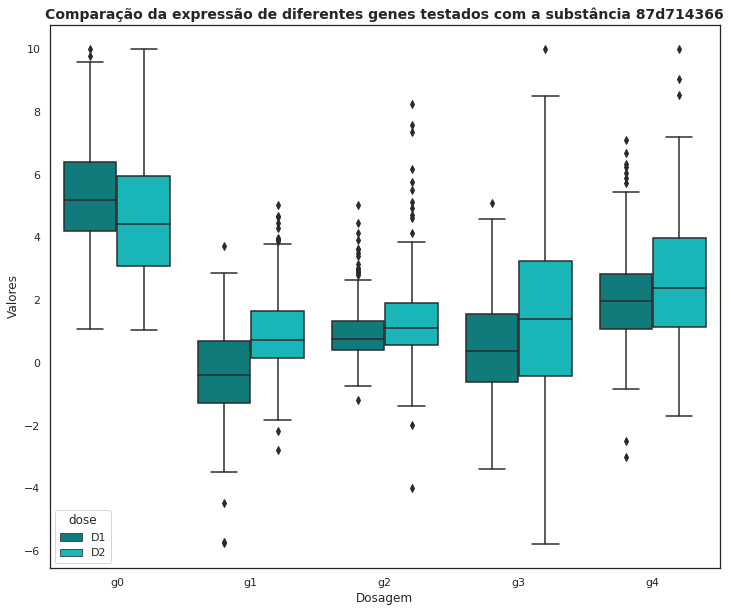

In [48]:
ax = sns.boxplot(x='gene', y='expressao', data=teste, hue='dose', palette=['darkcyan', 'darkturquoise'])
ax.figure.set_size_inches(12, 10)
ax.set_title("Comparação da expressão de diferentes genes testados com a substância 87d714366", fontsize=14, fontweight='bold')
ax.set_xlabel('Dosagem')
ax.set_ylabel('Valores')
ax;

Comparando o efeito da substância em diferentes genes com relação a dosagem, observamos que na maioria, a substância parece aumentar a atividade com a dose 2. No entanto, o gráfico também mostra uma grande variação nos valores de atividade para o g3, o que indica que pode não haver diferença significativa entre as dosagens testadas.

### Desafio 3: Criar três colunas para indicar os tempos 24, 48, 72 horas.

criando variáveis categóricas usando a função get_dummies

In [41]:
#trasnformando a variável 'tempo' em 3 novas variáveis binárias
dados_combinados = pd.get_dummies(dados_combinados, columns=['tempo'])
dados_combinados.head()

,id,tratamento,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,...,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle,tempo_24,tempo_48,tempo_72
0,id_000644bb2,com_droga,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0,1,0,0
1,id_000779bfc,com_droga,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,0,0,1
2,id_000a6266a,com_droga,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,0,1,0
3,id_0015fd391,com_droga,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,0,1,0
4,id_001626bd3,com_droga,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,0,0,1


### Desafio 4:Estudar sobre combinações de df's.

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Desafio 6: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não algum moa. Avaliar o tempo de experimento, se há aumento na ativação com o passar do tempo.

In [42]:
selecao_moa_nunique = dados_combinados.groupby(by='composto')['ativo_moa'].nunique()
selecao_moa_nunique

composto
00199ff52    1
00251fc41    1
00321ea80    1
0034c0847    1
0060e686f    1
            ..
ff9565933    1
ffd66e220    1
ffe357f8f    1
ffed8e1c9    1
fff7d208d    1
Name: ativo_moa, Length: 3289, dtype: int64

In [43]:
#conferir se algum composto por acaso ativa e não ativa genes dependendo da condição
count = 0
for i in range(len(selecao_moa_nunique)):
  if selecao_moa_nunique[i] == 1:
    pass
  else:
    count += 1
    print(selecao_moa_nunique[i].index)

if count == 0:
  print('Todos os compostos apresentam somentem um tipo de ativação de moa')
else:
  pass

Todos os compostos apresentam somentem um tipo de ativação de moa


### Desafio 7: Descobrir se tem algum composto que dependendo do tempo de experimento, há aumento na ativação com o passar do tempo.

Todos os compostos apresentam somentem um tipo de ativação de moa


## Aula 5 - Machine Learning, Sci-kit Learning e desafios envolvidos

Nesta aula foram apresentados alguns modelos de predição. Os modelos precisando de um base de comparação que pode ser obtida utilizando o modelo mais simples chamado *Dummy Classifier.* Para criar um modelo, os dados precisam ser separados em dados de treino (dados de aprendizado do modelo) e teste (dados que verificam a habilidade do modelo em prever dados desconhecidos). Uma boa seleção das variáveis a serem utilizadas é muito importante para obtenção de modelos mais robustos. Sendo assim, é importante conhecer os dados e/ou trabalhar junto com o especialista. O ajuste dos parâmetros do modelos também é importante para melhorar o resultado obtido. O uso de modelos menos robusto para analisar dados mais complexos, dados reais, não permite obter resultados muito expressivos e aplicáveis, mas estes podem ainda serem melhorados pela alteração de parâmetros, avaliação minuciosa dos dados a serem utilizados.

Modelos testados:

```python
DummyClassifier('most_frequent')
LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
GradientBoostingClassifier()
```

###Desafio 1: Tente outros modelos ou mude os parâmetros dos modelos que testamos em aula.

**Gradient Boosting Classifier**

In [46]:
#alterando os dados utilizados para criar o modelo
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto', 'eh_controle'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose'])
y = dados_combinados['ativo_moa']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=376)

#testando o modelo  Gradient Boosting
modelo_grad_boost = GradientBoostingClassifier(max_depth=3)
modelo_grad_boost.fit(x_train, y_train)
modelo_grad_boost.score(x_test, y_test)

0.688011757295822

**Validação Cruzada**

Uma forma de melhorar os resultados do modelo é utilizando validação cruzada. O objetivo da validação cruzada é testar a capacidade do modelo de prever novos dados que não foram usados ​​na estimativa, a fim de sinalizar problemas como overfitting ou viés de seleção, e dar uma visão de como o modelo irá performar para um conjunto de dados desconhecido.

Na validação cruzada os dados são dividios em subconjuntos complementares (k-folds), realizando a análise em um subconjunto (conjunto de treino) e validando a análise no outro subconjunto (conjunto de teste). Para reduzir a variabilidade, a validação cruzada é realizada n vezes, método chamado k-fold cross validation, usando diferentes partições e os resultados da validação são combinados ao longo das rodadas para dar uma estimativa do desempenho preditivo do modelo.

In [ ]:
'''
Modelo Random Forest Classifier criado com validação cruzada.
Tempo de execução muito longo.
'''

from sklearn.model_selection import cross_validate #treina e testa o modelo com todos os dados
from sklearn.model_selection import RepeatedStratifiedKFold

#seleção de dados
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto', 'eh_controle'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose'])
y = dados_combinados['ativo_moa']

#modelo
modelo_randomforest = RandomForestClassifier()

#validação cruzada
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
cross_validate(modelo_randomforest, x, y, cv=cv, scoring='roc_auc', return_train_score=True)

### Desafio 2: Estudar a documentação do Sklearn.

https://scikit-learn.org/stable/index.html

### Desafio 3: Pesquisar o fluxograma

![](https://scikit-learn.org/stable/_static/ml_map.png)

### Desafio 4: Testar outros problemas de classificação (perguntas).
somos capazes de dizer se houve um método de ativação.

### Desafio 5: Escolha a droga mais utilizada e tente criar um modelo para prever esta label.

selecionar droga e controle.



---



---

